In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots
from astropy.time import Time

In [2]:
opsdb = db.OpsimDatabase('baseline2018a.db')
outDir = 'outDir'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
def GetDateRange(StartYear, EndYear, Season):

    if Season == 'spring' or Season == 'Spring':
        Date1 = '02-04'
        Date2 = '05-06'
    elif Season == 'summer' or Season == 'Summer':
        Date1 = '05-06'
        Date2 = '08-08'
    elif Season == 'autumn' or Season == 'Autumn':
        Date1 = '08-08'
        Date2 = '11-07'
    elif Season == 'winter' or Season == 'Winter':
        Date1 = '11-07'
        Date2 = '02-04'
    else:
        print('Please enter a season!')
        
    DateRange = []
        
    for Y in range(StartYear, EndYear+1):
        
        Time1 = str(Y) + '-' + Date1
        if Season == 'winter' or Season == 'Winter':
            Y = Y+1
        Time2 = str(Y) + '-' + Date2

        t1 = Time(Time1, format='isot', scale='utc')
        t2 = Time(Time2, format='isot', scale='utc')
        MJD1 = t1.mjd
        MJD2 = t2.mjd
        
        DateRange = DateRange+[[MJD1, MJD2]]
        
    return DateRange

In [4]:
class CountMultiSegMetric(metrics.BaseMetric):
    """Count the number of visit when the values a specific colomn fall into some certain intervals.
    The boudaries of the intervals should be provided as a nested list."""
    
    def __init__(self, col, bounds, **kwargs):
        super(CountMultiSegMetric, self).__init__(col=col, **kwargs)
        self.colname = col
        self.bounds = bounds
        
    def run(self, dataSlice, slicePoint=None):
        
        # Check if there is only one or multimuple intervals.
        if len(np.array(self.bounds).shape) == 2:
            
            for i in range(len(self.bounds)):
                if i == 0:
                    # Look for the indices of the data that fullfil the criteria. 
                    index = np.nonzero( np.logical_and(dataSlice[self.colname] >= self.bounds[i][0], 
                                                       dataSlice[self.colname] < self.bounds[i][1]) )[0]
                        
                else: 
                    indexCurrent = np.nonzero( np.logical_and(dataSlice[self.colname] >= self.bounds[i][0], 
                                                              dataSlice[self.colname] < self.bounds[i][1]) )[0]
                    index = np.union1d(index, indexCurrent)

            count = len(index)
            return count
        
        # If only one interval is provided.
        elif len(np.array(self.bounds).shape) == 1: 
            
            index = np.nonzero( np.logical_and(dataSlice[self.colname] > self.bounds[0], 
                                               dataSlice[self.colname] < self.bounds[1]))[0]
            count = len(index)
            return count

In [8]:
def RunRoutine(DateRange):
    m = CountMultiSegMetric('observationStartMJD', DateRange)
    Slicer = slicers.HealpixSlicer(nside=8)
    Sqlconstraint = 'proposalId=3 and airmass>1.1 and fiveSigmaDepth>23'

    mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
    resultdsDb = db.ResultsDb(outDir=outDir)
    BundleDict = {'CountMultiSegMetric': mb}

    group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)
    group.runAll()
    mb.metricValues.mask[np.nonzero(mb.metricValues==0)[0]] = True
    mb.plot(plotFunc=plots.HealpixSkyMap(), savefig=True)    

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint proposalId=3 and airmass>1.1 and fiveSigmaDepth>23 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 379867 visits
Running:  ['CountMultiSegMetric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


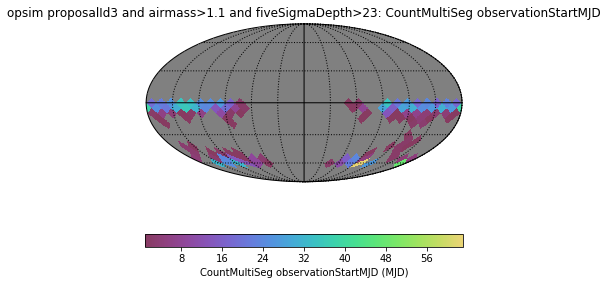

In [9]:
#Set inquire years and season
Year1 = 2022
Year2 = 2023
Season = 'spring'

DateRange = GetDateRange(Year1, Year2, Season)

RunRoutine(DateRange)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint proposalId=3 and airmass>1.1 and fiveSigmaDepth>23 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 379867 visits
Running:  ['CountMultiSegMetric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


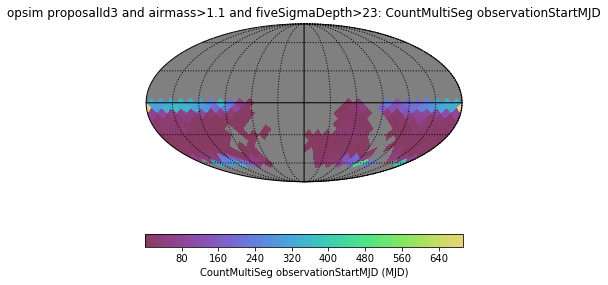

In [11]:
#Set inquire years and season
Year1 = 2022
Year2 = 2032
Season = 'spring'

DateRange = GetDateRange(Year1, Year2, Season)

RunRoutine(DateRange)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint proposalId=3 and airmass>1.1 and fiveSigmaDepth>23 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 379867 visits
Running:  ['CountMultiSegMetric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


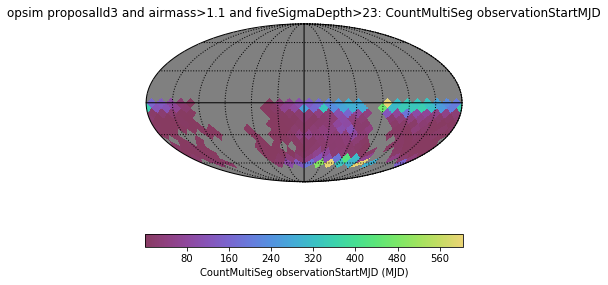

In [12]:
#Set inquire years and season
Year1 = 2022
Year2 = 2032
Season = 'summer'

DateRange = GetDateRange(Year1, Year2, Season)

RunRoutine(DateRange)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint proposalId=3 and airmass>1.1 and fiveSigmaDepth>23 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 379867 visits
Running:  ['CountMultiSegMetric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


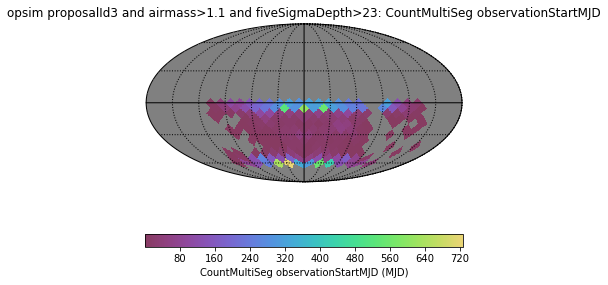

In [13]:
#Set inquire years and season
Year1 = 2022
Year2 = 2032
Season = 'autumn'

DateRange = GetDateRange(Year1, Year2, Season)

RunRoutine(DateRange)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint proposalId=3 and airmass>1.1 and fiveSigmaDepth>23 for columns ['fieldDec', 'fieldRA', 'observationStartMJD']
Found 379867 visits
Running:  ['CountMultiSegMetric']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


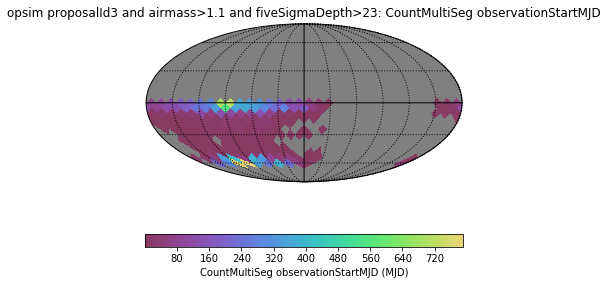

In [14]:
#Set inquire years and season
Year1 = 2022
Year2 = 2032
Season = 'winter'

DateRange = GetDateRange(Year1, Year2, Season)

RunRoutine(DateRange)